In [ ]:
"""
   - ------   BINANCE WEBSOCKET ERROR  -------
      -----------  TEST LIVE DATA and DATA BASE --------
              ( - ICI CA MARCHE - )
YT :::
Algovibes
39,3 k abonnés

FIX ERROR BINANCE WEBSOCKET ...

How to get LIVE cryptocurrency data with Python using the 
Binance API / 
ERROR FIXING
https://www.youtube.com/watch?v=OX5eDJDtqhc
https://www.youtube.com/watch?v=OX5eDJDtqhc

YT  :::
INFINITY ALEX  ( - ICI CA MARCHE - )
https://www.youtube.com/watch?v=ml3jGc8RqMk
https://www.youtube.com/watch?v=ml3jGc8RqMk

"""

In [142]:
pip install python-binance

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: python-binance in c:\users\user\miniconda3\lib\site-packages (1.0.16)



In [143]:
pip install sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [244]:
import sqlalchemy
from binance import Client

In [245]:
import pandas as pd
#import python_ta as ta
import numpy as np

In [246]:
# LE SCREENER  2 ........................................................
api_key ='GwvK4xNzrBr1HpEozMWx2AnWevMRlUZxPgroPvDcy2l4tqdzBH1eBa6PSpriyQTb'
api_secret = 'DGij2y3b9teZHM0vrqafkGzuKbtKCM4wtI3RpA96DqPFNo433HCUJhs4cnSI3MQq'
client = Client(api_key,api_secret)
#client = Client()
client.get_account()  # <<< Pour avoir le solde du compte BINANACE   ...

{'makerCommission': 10,
 'takerCommission': 10,
 'buyerCommission': 0,
 'sellerCommission': 0,
 'canTrade': True,
 'canWithdraw': True,
 'canDeposit': True,
 'updateTime': 1651749272009,
 'accountType': 'SPOT',
 'balances': [{'asset': 'BTC', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'LTC', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'ETH', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'NEO', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'BNB', 'free': '0.10283244', 'locked': '0.00000000'},
  {'asset': 'QTUM', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'EOS', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'SNT', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'BNT', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'GAS', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'BCC', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'USDT', 'free': '51.06668425', 'locked

In [247]:
symbol ='BTCUSDT'

In [5]:
engine = sqlalchemy.create_engine('sqlite:///'+ symbol + 'stream.db')

<AxesSubplot:>

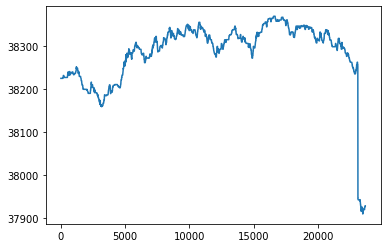

In [6]:
df=pd.read_sql('BTCUSDT', engine)
df.Price.plot()
#Fdf.plot()

In [7]:
def strategy(entry, loockback, qty, open_position=False):
  while True:
    # time.sleep(0.5)
    df=pd.read_sql('BTCUSDT', engine)
    lookbackperiod = df.iloc [-loockback:]
    cumret = (lookbackperiod.Price.pct_change() +1).cumprod() - 1

    df['sma9'] = df['Price'].rolling(9).mean() # <<<--- SMA 9 --------.
    df['sma21'] = df['Price'].rolling(21).mean() # <<<--- SMA 21 --------..
    backrollingN = 10  #  <<<  ---  for SLOPES  ----
    df['slope21'] = df['sma21'].diff(periods=1) # <<<--- SLOPES ------.
    df['slope21'] = df['slope21'].rolling(window=backrollingN).mean()

    
    if not open_position :
      if (cumret [cumret.last_valid_index()] > entry and
          df.Price.iloc[-1] > df.sma21.iloc[-1] and
          df.slope21.iloc[-1] > 0):
          order = client.create_order(symbol='BTCUSDT' ,
                                    side='BUY',
                                    type='MARKET',
                                    quantity=qty)
          print(order)
          print('BUY :::')
          print('BuyPrice : ', df.Price.iloc[-1] )
          open_position = True
          break
  if open_position:
      while True:
        df = pd.read_sql('BTCUSDT', engine)
        sincebuy = df.loc[df.time >
                          pd.to_datetime(order['transactTime'], 
                          unit='ms')]
        if len(sincebuy) > 1:
          sincebuyret = (sincebuy.Price.pct_change() +1).cumprod() - 1
          last_entry = sincebuyret[sincebuyret.last_valid_index()]
          if last_entry > 0.0010 or last_entry < -0.0010:
            order = client.create_order(symbol='BTCUSDT',
                                         side='SELL',
                                         type='MARKET',
                                         quantity=qty)
            print(order)
            print('SELL :::')
            print('SellPrice : ', df.Price.iloc[-1] )

            # Test Price succes et mettre resultat dans summary ...

            open_position = False
            break

In [248]:
# LE SCREENER  2 ........................................................
# Function to get minute by minute...
def getminutedata(symbol, interval, lookback):
    frame = pd.DataFrame(client.get_historical_klines(symbol, interval, lookback + ' min ago UTC'))  
        
    frame = frame.iloc[:,:6]  # Select First six colonnes .....
    frame.columns =['Time', 'Open', 'High', 'Low', 'Close', 'Volume'] # rename colonnes
    frame = frame.set_index('Time')  # Set time to index  ...
    frame.index = pd.to_datetime(frame.index, unit='ms') # reformat index ...
    frame = frame.astype(float)  # transform string to float
    return frame

In [249]:
def strategyENGULFING(symbol, qty, open_position=False):
#.def strategyENGULFING(entry, loockback, qty, open_position=False):
  #.while True:
    # time.sleep(0.5)
    # df=pd.read_sql('BTCUSDT', engine)
    df = getminutedata(symbol, '1m', '30') # <<-- 30 dernieres minutes .
    #.df = getminutedata(x['symbol'], '1m', '730') # <<-- 730 minutes pour 12 heures..
    
    #..lookbackperiod = df.iloc [-loockback:]
    #..cumret = (lookbackperiod.Open.pct_change() +1).cumprod() - 1

    df['sma9'] = df['Close'].rolling(9).mean() # <<<--- SMA 9 --------.
    df['sma21'] = df['Close'].rolling(21).mean() # <<<--- SMA 21 --------..
    backrollingN = 10  #  <<<  ---  for SLOPES  ----
    df['slope21'] = df['sma21'].diff(periods=1) # <<<--- SLOPES ------.
    df['slope21'] = df['slope21'].rolling(window=backrollingN).mean()

    #bodydiff[row] = abs(df.Open.iloc[-1]-df.Close.iloc[-1])
    bodydiff = abs(df.Open.iloc[-1]-df.Close.iloc[-1])
    bodydiffprec = abs(df.Open.iloc[-2]-df.Close.iloc[-2])
    bodydiffmin = 0.003
    if not open_position :  # <<-- in_position ...
      #if (cumret [cumret.last_valid_index()] > entry and
      #    df.Price.iloc[-1] > df.sma21.iloc[-1] and
      #    df.slope21.iloc[-1] > 0):
      if (bodydiff > bodydiffmin and bodydiffprec > bodydiffmin and
          df.Open.iloc[-2] > df.Close.iloc[-2] and
          df.Open.iloc[-1] < df.Close.iloc[-1] and

          df.Close.iloc[-1] > df.sma21.iloc[-1] and # <<< ---- check SMA 21 ...
          df.Close.iloc[-1] > df.sma9.iloc[-1] and # <<< ---- check SMA 9 ...  
          df.sma9.iloc[-1] >= df.sma21.iloc[-1] and # <<< ---- check SMA 9 > SMA21 ...                        

           #open[row]<=close[row-1] and close[row]>open[row-1]):
          (df.Open.iloc[-1]-df.Close.iloc[-2])<=-0e-5 and df.Close.iloc[-1]>df.Open.iloc[-2] 
          ):          
          # order = client.create_order(symbol='BTCUSDT' ,
          order = client.create_order(symbol=symbol ,
                                    side='BUY',
                                    type='MARKET',
                                    quantity=qty)
          print(order)
          print('BUY :::')
          print('BuyPrice : ', df.Close.iloc[-1] )
          open_position = True
      else:
          print('No ', symbol ,' ENGULFING Trade has been found executed')    
          #.break
    if open_position:     # <<-- in_position ...
        while True:
          #.df = pd.read_sql('BTCUSDT', engine)
          df = getminutedata(symbol, '1m', '30') # <<-- 30 dernieres minutes ...
          sincebuy = df.loc[df.index >
                            pd.to_datetime(order['transactTime'], 
                            unit='ms')]
          if len(sincebuy) > 0:
            sincebuyret = (sincebuy.Open.pct_change() +1).cumprod() - 1
            #. last_entry = sincebuyret[sincebuyret.last_valid_index()]
            #. if last_entry > 0.0010 or last_entry < -0.0010:
            if sincebuyret[-1] > 0.0015 or sincebuyret[-1] < -0.0008:  
              # order = client.create_order(symbol='BTCUSDT',
              order = client.create_order(symbol=symbol,
                                           side='SELL',
                                           type='MARKET',
                                           quantity=qty)
              print(order)
              print('SELL :::')
              print('SellPrice : ', df.Close.iloc[-1] )

              # Test Price succes et mettre resultat dans summary ...

              open_position = False
              break

            #           FIN ---- ENGULFING   ---   FIN 
            #           FIN ---- ENGULFING   ---   FIN 
            #           FIN ---- ENGULFING   ---   FIN 
            #           FIN ---- ENGULFING   ---   FIN 

In [ ]:
strategy(0.001, 300, 0.001)

In [ ]:
import time
open_position = False
while True:
    # time.sleep(60) # <<< --- 60 pour 1 minute ...
    if not open_position:
        strategy(0.001, 300, 0.001)

In [10]:
import time
open_position = False
while True:
    time.sleep(10) # <<< --- 60 pour 1 minute ...
    print('Test   Temp dattente  xx .......')
    # if not open_position:
    #     strategy(0.001, 300, 0.001)
    #     strategyENGULF(0.001, 300, 0.001)

Test   Temp dattente  xx .......
Test   Temp dattente  xx .......
Test   Temp dattente  xx .......
Test   Temp dattente  xx .......
Test   Temp dattente  xx .......
Test   Temp dattente  xx .......
Test   Temp dattente  xx .......
Test   Temp dattente  xx .......
Test   Temp dattente  xx .......
Test   Temp dattente  xx .......
Test   Temp dattente  xx .......
Test   Temp dattente  xx .......
Test   Temp dattente  xx .......
Test   Temp dattente  xx .......
Test   Temp dattente  xx .......


KeyboardInterrupt: 

In [23]:
symbol ='BTCUSDT'
open_position = False
strategyENGULFING(symbol, 0.001)

No ENGULFING Trade has been found executed


In [220]:
# Buy quantity ....
symbol ='ENSUSDT'
invest = 40  #  Dollars ....
def buy_quantity(symbol, invest):

    info = client.get_symbol_info(symbol=symbol)
    lotsize = float([i for i in info['filters'] if i['filterType']=='LOT_SIZE'][0]['minQty'])
    print(lotsize)
    #test = str(lotsize).split('.')[1]
    #print(test)
    prize = float(client.get_symbol_ticker(symbol=symbol)['price'])
    long = len(str(lotsize).split('.')[0] )
    buy_qty = round(invest/prize, long )
    
    return buy_qty

In [221]:
buy_qty = buy_quantity(symbol, invest)
buy_qty

0.01


1.9

In [109]:

#buy_qty = round(invest/prize, len(str(lotsize).split('.')[1]) )
buy_qty = round(invest/prize, 3 )

In [111]:
buy_qty

0.194

In [222]:
import time

symbol ='BTCUSDT'
open_position = False
print('Test   Temps dattente  xx .......')
while True:
    # time.sleep(60) # <<< --- 60 pour 1 minute ...
    if not open_position:
        # Buy quantity ....
        symbol ='BTCUSDT'
        invest = 40  #  Dollars ....
        #buy_qty = round(invest/prize, len(str(lotsize).split('.')[1]) )
        #buy_qty = round(invest/prize, 3 )
        buy_qty = buy_quantity(symbol, invest)
        #strategy(0.001, 300, 0.001)
        #strategyENGULF(0.001, 300, 0.001)
        strategyENGULFING(symbol, buy_qty)    
   

    print('Test   Temps dattente  xx .......')
    time.sleep(60) # <<< --- 60 pour 1 minute ...
    
                                              

Test   Temps dattente  xx .......
1e-05
No  BTCUSDT  ENGULFING Trade has been found executed
Test   Temps dattente  xx .......


KeyboardInterrupt: 

In [250]:
import time

symbol ='BTCUSDT'
open_position = False
print('Test   Temps dattente  xx .......')
while True:
    # time.sleep(60) # <<< --- 60 pour 1 minute ...
    if not open_position:
        # Buy quantity ....
        symbol ='ETHUSDT'
        print('Look  at ::: ', symbol)
        invest = 40  #  Dollars ....
        info = client.get_symbol_info(symbol=symbol)
        lotsize = float([i for i in info['filters'] if i['filterType']=='LOT_SIZE'][0]['minQty'])
        prize = float(client.get_symbol_ticker(symbol=symbol)['price'])
        #buy_qty = round(invest/prize, len(str(lotsize).split('.')[1]) )
        buy_qty = round(invest/prize, len(str(lotsize).split('.')[0]) )
        buy_qty = round(invest/prize, 3 )
        #strategy(0.001, 300, 0.001)
        #strategyENGULF(0.001, 300, 0.001)
        strategyENGULFING(symbol, buy_qty)    
 
    if not open_position:
        # Buy quantity ....
        symbol ='XMRUSDT'
        print('Look  at ::: ', symbol)        
        invest = 40  #  Dollars ....
        info = client.get_symbol_info(symbol=symbol)
        lotsize = float([i for i in info['filters'] if i['filterType']=='LOT_SIZE'][0]['minQty'])
        prize = float(client.get_symbol_ticker(symbol=symbol)['price'])
        buy_qty = round(invest/prize, len(str(lotsize).split('.')[0]) )
        #buy_qty = round(invest/prize, 3 )
        #strategy(0.001, 300, 0.001)
        #strategyENGULF(0.001, 300, 0.001)
        strategyENGULFING(symbol, buy_qty)

    #if not open_position:
    #    # Buy quantity ....
    #    symbol ='ZENUSDT'
    #    print('Look  at ::: ', symbol)        
    #    invest = 40  #  Dollars ....
    #    info = client.get_symbol_info(symbol=symbol)
    #    lotsize = float([i for i in info['filters'] if i['filterType']=='LOT_SIZE'][0]['minQty'])
    #    #prize = float(client.get_symbol_ticker(symbol=symbol)['price'])
    #    buy_qty = round(invest/prize, len(str(lotsize).split('.')[0]) )
    #    #buy_qty = round(invest/prize, 3 )
    #    #strategy(0.001, 300, 0.001)
    #    #strategyENGULF(0.001, 300, 0.001)
    #    strategyENGULFING(symbol, buy_qty)

    if not open_position:
        # Buy quantity ....
        symbol ='ARUSDT'
        print('Look  at ::: ', symbol)        
        invest = 40  #  Dollars ....
        info = client.get_symbol_info(symbol=symbol)
        lotsize = float([i for i in info['filters'] if i['filterType']=='LOT_SIZE'][0]['minQty'])
        prize = float(client.get_symbol_ticker(symbol=symbol)['price'])
        buy_qty = round(invest/prize, len(str(lotsize).split('.')[0]) )
        #buy_qty = round(invest/prize, 3 )
        #strategy(0.001, 300, 0.001)
        #strategyENGULF(0.001, 300, 0.001)
        strategyENGULFING(symbol, buy_qty)

    if not open_position:
        # Buy quantity ....
        symbol ='RUNEUSDT'
        print('Look  at ::: ', symbol)        
        invest = 40  #  Dollars ....
        info = client.get_symbol_info(symbol=symbol)
        lotsize = float([i for i in info['filters'] if i['filterType']=='LOT_SIZE'][0]['minQty'])
        prize = float(client.get_symbol_ticker(symbol=symbol)['price'])
        buy_qty = round(invest/prize, len(str(lotsize).split('.')[0]) )
        #buy_qty = round(invest/prize, 3 )
        #strategy(0.001, 300, 0.001)
        #strategyENGULF(0.001, 300, 0.001)
        strategyENGULFING(symbol, buy_qty)

    if not open_position:
        # Buy quantity ....
        symbol ='HNTUSDT'
        print('Look  at ::: ', symbol)        
        invest = 40  #  Dollars ....
        info = client.get_symbol_info(symbol=symbol)
        lotsize = float([i for i in info['filters'] if i['filterType']=='LOT_SIZE'][0]['minQty'])
        prize = float(client.get_symbol_ticker(symbol=symbol)['price'])
        buy_qty = round(invest/prize, len(str(lotsize).split('.')[0]) )
        #buy_qty = round(invest/prize, 3 )
        #strategy(0.001, 300, 0.001)
        #strategyENGULF(0.001, 300, 0.001)
        strategyENGULFING(symbol, buy_qty)

    if not open_position:
        # Buy quantity ....
        symbol ='SOLUSDT'
        print('Look  at ::: ', symbol)        
        invest = 40  #  Dollars ....
        info = client.get_symbol_info(symbol=symbol)
        lotsize = float([i for i in info['filters'] if i['filterType']=='LOT_SIZE'][0]['minQty'])
        prize = float(client.get_symbol_ticker(symbol=symbol)['price'])
        buy_qty = round(invest/prize, len(str(lotsize).split('.')[0]) )
        #buy_qty = round(invest/prize, 3 )
        #strategy(0.001, 300, 0.001)
        #strategyENGULF(0.001, 300, 0.001)
        strategyENGULFING(symbol, buy_qty)

    if not open_position:
        # Buy quantity ....
        symbol ='LUNAUSDT'
        print('Look  at ::: ', symbol)        
        invest = 40  #  Dollars ....
        info = client.get_symbol_info(symbol=symbol)
        lotsize = float([i for i in info['filters'] if i['filterType']=='LOT_SIZE'][0]['minQty'])
        prize = float(client.get_symbol_ticker(symbol=symbol)['price'])
        buy_qty = round(invest/prize, len(str(lotsize).split('.')[0]) )
        #buy_qty = round(invest/prize, 3 )
        #strategy(0.001, 300, 0.001)
        #strategyENGULF(0.001, 300, 0.001)
        strategyENGULFING(symbol, buy_qty)

    if not open_position:
        # Buy quantity ....
        symbol ='ENSUSDT'
        print('Look  at ::: ', symbol)        
        invest = 40  #  Dollars ....
        info = client.get_symbol_info(symbol=symbol)
        lotsize = float([i for i in info['filters'] if i['filterType']=='LOT_SIZE'][0]['minQty'])
        prize = float(client.get_symbol_ticker(symbol=symbol)['price'])
        buy_qty = round(invest/prize, len(str(lotsize).split('.')[0]) )
        #buy_qty = round(invest/prize, 3 )
        #strategy(0.001, 300, 0.001)
        #strategyENGULF(0.001, 300, 0.001)
        strategyENGULFING(symbol, buy_qty)   

    #if not open_position:
    #    # Buy quantity ....
    #    symbol ='ATOMUSDT'
    #    print('Look  at ::: ', symbol)        
    #    invest = 40  #  Dollars ....
    #    info = client.get_symbol_info(symbol=symbol)
    #    lotsize = float([i for i in info['filters'] if i['filterType']=='LOT_SIZE'][0]['minQty'])
    #    prize = float(client.get_symbol_ticker(symbol=symbol)['price'])
    #    buy_qty = round(invest/prize, len(str(lotsize).split('.')[0]) )
    #    #buy_qty = round(invest/prize, 3 )
    #    #strategy(0.001, 300, 0.001)
    #    #strategyENGULF(0.001, 300, 0.001)
    #    strategyENGULFING(symbol, buy_qty)        

    print('Test   Temps dattente  xx .......')
    time.sleep(50) # <<< --- 60 pour 1 minute ...
    
                                              

Test   Temps dattente  xx .......
Look  at :::  ETHUSDT
No  ETHUSDT  ENGULFING Trade has been found executed
Look  at :::  XMRUSDT
No  XMRUSDT  ENGULFING Trade has been found executed
Look  at :::  ARUSDT
No  ARUSDT  ENGULFING Trade has been found executed
Look  at :::  RUNEUSDT
No  RUNEUSDT  ENGULFING Trade has been found executed
Look  at :::  HNTUSDT
No  HNTUSDT  ENGULFING Trade has been found executed
Look  at :::  SOLUSDT
{'symbol': 'SOLUSDT', 'orderId': 2733844025, 'orderListId': -1, 'clientOrderId': 'efqWiHhFLRDbVY39j9IOZT', 'transactTime': 1653104484498, 'price': '0.00000000', 'origQty': '0.80000000', 'executedQty': '0.80000000', 'cummulativeQuoteQty': '39.59200000', 'status': 'FILLED', 'timeInForce': 'GTC', 'type': 'MARKET', 'side': 'BUY', 'fills': [{'price': '49.49000000', 'qty': '0.25000000', 'commission': '0.00003082', 'commissionAsset': 'BNB', 'tradeId': 273889785}, {'price': '49.49000000', 'qty': '0.55000000', 'commission': '0.00006781', 'commissionAsset': 'BNB', 'tradeId

ValueError: Length mismatch: Expected axis has 0 elements, new values have 6 elements